In [ ]:
# def cost_func(circ, layouts, backend):
#     """
#     A custom cost function that includes T1 and T2 computed during idle periods

#     Parameters:
#         circ (QuantumCircuit): circuit of interest
#         layouts (list of lists): List of specified layouts
#         backend (IBMQBackend): An IBM Quantum backend instance

#     Returns:
#         list: Tuples of layout and cost
#     """
#     out = []
#     props = backend.properties()
#     dt = backend.configuration().dt
#     num_qubits = backend.configuration().num_qubits
#     t1s = [props.qubit_property(qq, 'T1')[0] for qq in range(num_qubits)]
#     t2s = [props.qubit_property(qq, 'T2')[0] for qq in range(num_qubits)]
#     for layout in layouts:
#         sch_circ = transpile(circ, backend, initial_layout=layout,
#                              optimization_level=0, scheduling_method='alap')
#         error = 0
#         fid = 1
#         touched = set()
#         for item in sch_circ.data:
#             if item.operation.name in ['cx', 'cz', 'ecr']:
#                 q0 = item.qubits[0]._index
#                 q1 = item.qubits[1]._index
#                 fid *= (1-props.gate_error(item.operation.name, [q0, q1]))
#                 touched.add(q0)
#                 touched.add(q1)

#             elif item.operation.name in ['sx', 'x']:
#                 q0 = item.qubits[0]._index
#                 fid *= 1-props.gate_error(item.operation.name, q0)
#                 touched.add(q0)

#             elif item.operation.name == 'measure':
#                 q0 = item.qubits[0]._index
#                 fid *= 1-props.readout_error(q0)
#                 touched.add(q0)

#             elif item.operation.name == 'delay':
#                 q0 = item.qubits[0]._index
#                 # Ignore delays that occur before gates
#                 # This assumes you are in ground state and errors
#                 # do not occur.
#                 if q0 in touched:
#                     time = item.operation.duration * dt
#                     fid *= 1-idle_error(time, t1s[q0], t2s[q0])

#         error = 1-fid
#         out.append((layout, error))
#     return out


In [1]:
from qiskit import QuantumCircuit

def create_copy(circuit : QuantumCircuit)-> QuantumCircuit | None :
    if circuit.num_clbits == 0:
        return circuit
    new_circuit = QuantumCircuit(circuit.num_qubits)
    try:
        for item in circuit.data:
            if item.operation.name == 'measure' or item.operation.name == 'barrier':
                continue

            else:
                if item.operation.num_qubits == 1:
                    q0 = item.qubits[0]._index
                    new_circuit.append(item,q0)
                elif item.operation.num_qubits == 2:
                    q0 = item.qubits[0]._index
                    q1 = item.qubits[1]._index
                    new_circuit.append(item,q0,q1)
        return new_circuit
    except:
        return None

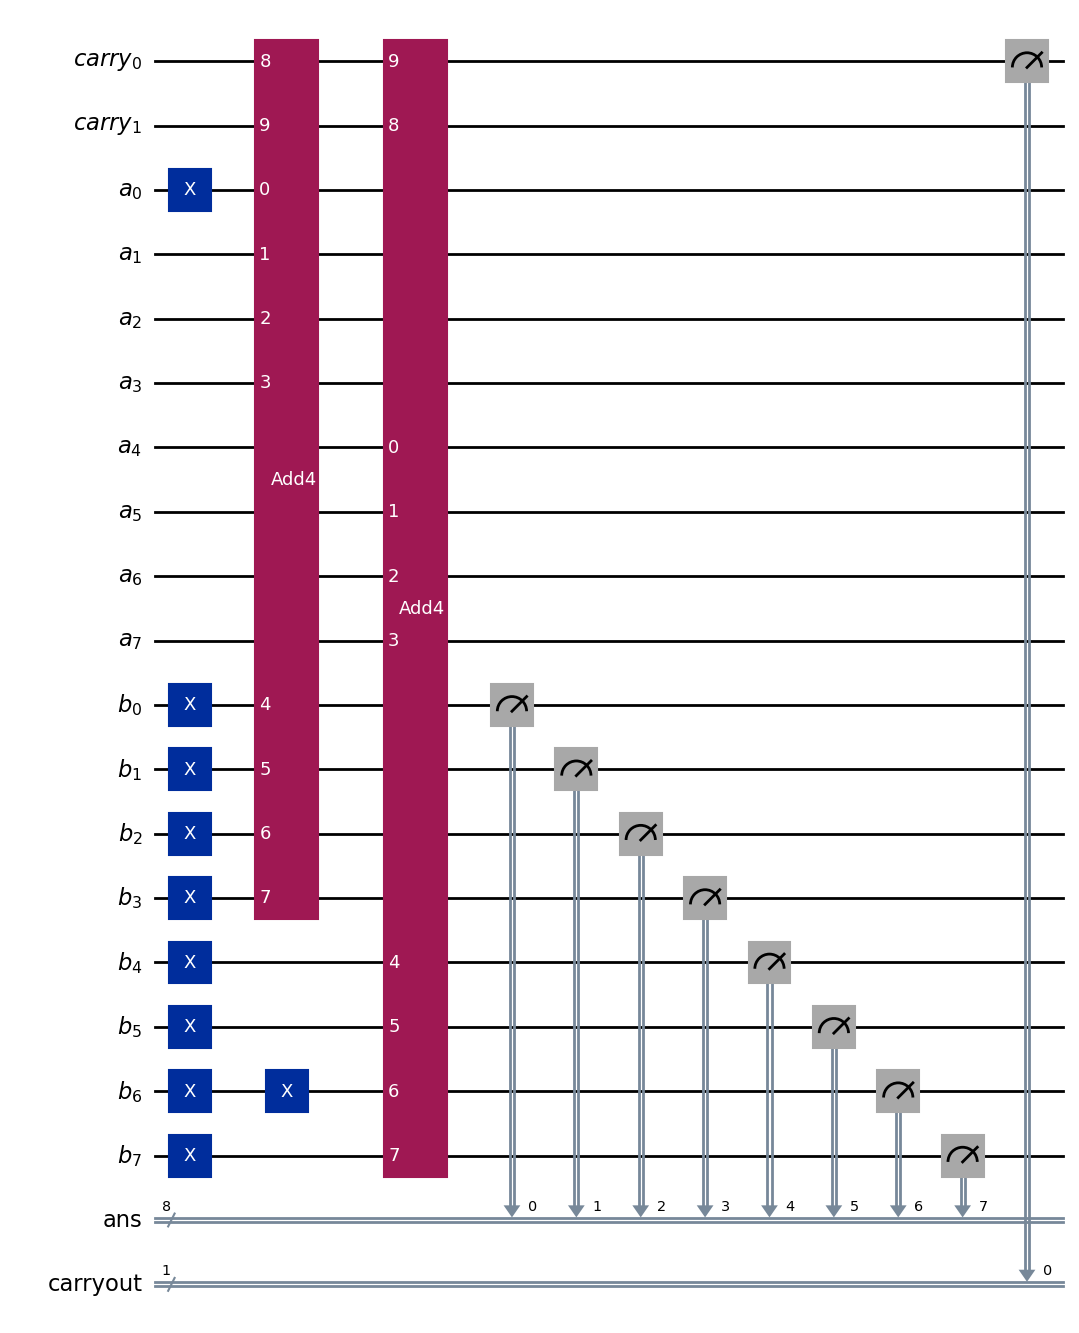

In [3]:
qc=QuantumCircuit.from_qasm_file("/Users/debarthipal/Library/CloudStorage/OneDrive-IBM/Desktop/VS files/cutting+obp_new_git_env/QASM_circuits_medium/bigadder_n18.qasm")
qc.draw("mpl")

In [ ]:

pm = generate_preset_pass_manager(optimization_level=3, basis_gates=backend.configuration().basis_gates, seed_transpiler=1)
synth_circuit = pm.run(qc)

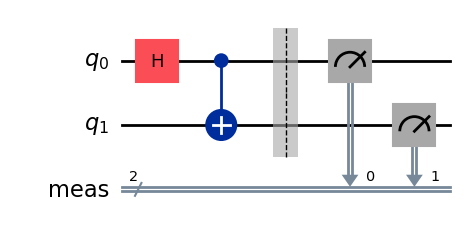

In [ ]:
# qc = QuantumCircuit(2)
# qc.h(0)
# qc.cx(0,1)
# qc.measure_all()
# qc.draw("mpl")

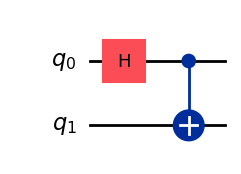

In [11]:
qc_new = create_copy(qc)
qc_new.draw("mpl")